In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.stats import weightstats as stests     #required libraries 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.simplefilter("ignore")

Continuous Vs Continuous-Correlation and VIF

In [2]:
iris=datasets.load_iris()
iris_pd=pd.DataFrame(iris.data)# Load Iris dataset into a DataFrame with feature columns and target class

iris_pd.columns=iris.feature_names
iris_pd["Class"]=iris.target

In [3]:
from sklearn.datasets import fetch_california_housing       #dataset for regression
housing=fetch_california_housing()
california_pd=pd.DataFrame(housing.data)
california_pd.columns=housing.feature_names
california_pd["MedHouseVal"]=housing.target


<Axes: >

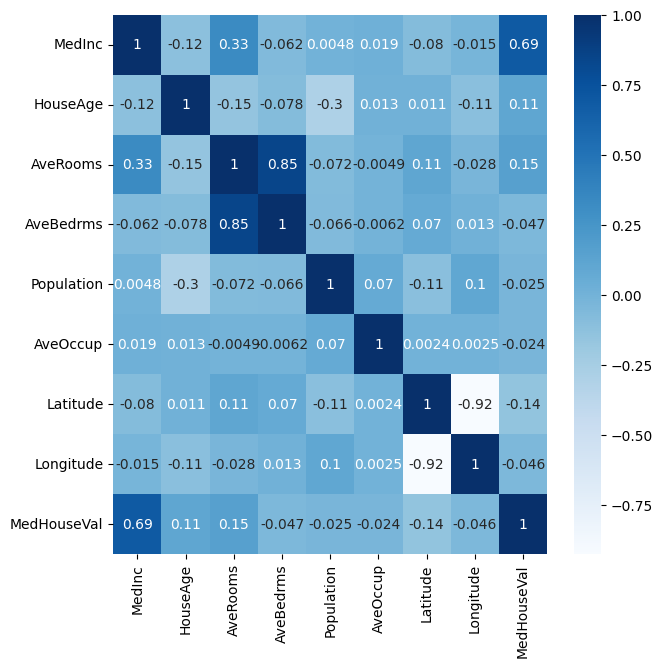

In [4]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(7,7))# Heatmap of Pearson correlation matrix for california_pd dataset with annotations

sns.heatmap(california_pd.corr(method="pearson"),annot=True,cmap="Blues",ax=ax)

In [5]:
#importing libraires for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    #calculating vif
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
    return (vif)

In [6]:
X=california_pd.iloc[:,:-1]
calc_vif(X)# Calculate Variance Inflation Factor (VIF) for feature set X from california_pd



,variables,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


Categorical VS Categorical -CHI SQUARE TEST

In [7]:
iris_pd.describe()#full statstical analysis of dataframe 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris_pd.head()#first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
print("Datatypes")
iris_pd.dtypes#finding the datatypes

Datatypes


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Class                  int64
dtype: object

In [10]:
iris_pd["petal width (cm)"].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64

In [11]:
bin_lab=["Low","High"]
iris_pd["Bin_Petal_Width"]=pd.qcut(iris_pd["petal width (cm)"],# Create binary bins (Low, High) for petal width using quantile-based discretization

                                    q=2,labels=bin_lab)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Bin_Petal_Width
0,5.1,3.5,1.4,0.2,0,Low
1,4.9,3.0,1.4,0.2,0,Low
2,4.7,3.2,1.3,0.2,0,Low
3,4.6,3.1,1.5,0.2,0,Low
4,5.0,3.6,1.4,0.2,0,Low


In [12]:
iris_pd["Bin_Petal_Width"].value_counts()#counting the highs and low

Bin_Petal_Width
Low     78
High    72
Name: count, dtype: int64

In [13]:
iris_pd["Class"]=iris_pd["Class"].astype("category")
print("Final Datatypes")# Convert Class column to categorical type and display final datatypes

iris_pd.dtypes

Final Datatypes


sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
Class                category
Bin_Petal_Width      category
dtype: object

In [14]:
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Bin_Petal_Width
0,5.1,3.5,1.4,0.2,0,Low
1,4.9,3.0,1.4,0.2,0,Low
2,4.7,3.2,1.3,0.2,0,Low
3,4.6,3.1,1.5,0.2,0,Low
4,5.0,3.6,1.4,0.2,0,Low
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,High
146,6.3,2.5,5.0,1.9,2,High
147,6.5,3.0,5.2,2.0,2,High
148,6.2,3.4,5.4,2.3,2,High


In [15]:
contingency_table=pd.crosstab(iris_pd["Bin_Petal_Width"],iris_pd["Class"])# Create contingency table of Bin_Petal_Width vs Class


In [16]:
contingency_table

Class,0,1,2
Bin_Petal_Width,,,
Low,50,28,0
High,0,22,50


In [17]:
from scipy import stats
chi2_stat,p_val,dof,ex=stats.chi2_contingency(contingency_table)
print("Chi Square Value:",chi2_stat)
print("Degree of freedom:",dof)
print("P value:",p_val)

print("Contigency Table")

ex
# Perform Chi-square test of independence on contingency table and display results





Chi Square Value: 100.64102564102565
Degree of freedom: 2
P value: 1.399841793168703e-22
Contigency Table


array([[26., 26., 26.],
       [24., 24., 24.]])

In [18]:
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Bin_Petal_Width
0,5.1,3.5,1.4,0.2,0,Low
1,4.9,3.0,1.4,0.2,0,Low
2,4.7,3.2,1.3,0.2,0,Low
3,4.6,3.1,1.5,0.2,0,Low
4,5.0,3.6,1.4,0.2,0,Low


<Axes: xlabel='Class', ylabel='sepal length (cm)'>

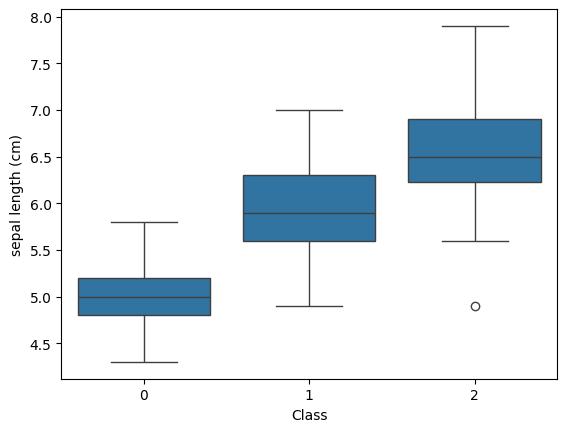

In [19]:
sns.boxplot(x="Class",y="sepal length (cm)",data=iris_pd)# Boxplot of sepal length across different Iris classes


In [20]:
print("Number of samples in the set:",len(iris_pd))
print("Therefore use Z test")
ztest,pval=stests.ztest(iris_pd["Class"],iris_pd["sepal length (cm)"],alternative="two-sided")
print("Z test value",ztest)# Perform two-sided Z-test between Class and sepal length

print("P value is ",pval)
#Pvalue is less then 0.05 so rejecting NULL hypothesis

Number of samples in the set: 150
Therefore use Z test
Z test value -50.92447470978208
P value is  0.0


In [21]:
iris_pd["Bin_Sepal_Width"]=pd.qcut(iris_pd["sepal width (cm)"],q=[0,0.5,1],labels=bin_lab)# Create binary bins (Low, High) for sepal width using quantile-based discretization


In [22]:
iris_pd.columns=iris_pd.columns.str.replace(' ','')
iris_pd.columns=iris_pd.columns.str.replace('(cm)','')
iris_pd.columns=iris_pd.columns.str.replace('[^a-zA-Z]','')
# Clean column names by removing spaces, '(cm)', and non-alphabetic characters




In [23]:
iris_pd

,sepallength,sepalwidth,petallength,petalwidth,Class,Bin_Petal_Width,Bin_Sepal_Width
0,5.1,3.5,1.4,0.2,0,Low,High
1,4.9,3.0,1.4,0.2,0,Low,Low
2,4.7,3.2,1.3,0.2,0,Low,High
3,4.6,3.1,1.5,0.2,0,Low,High
4,5.0,3.6,1.4,0.2,0,Low,High
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,High,Low
146,6.3,2.5,5.0,1.9,2,High,Low
147,6.5,3.0,5.2,2.0,2,High,Low
148,6.2,3.4,5.4,2.3,2,High,High


In [24]:
iris_pd['Class']=iris_pd['Class'].astype('int')

#Building Regression Model
model = ols('Class ~ C(Bin_Petal_Width) *C(Bin_Sepal_Width)',iris_pd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     177.8
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.55e-48
Time:                        23:03:05   Log-Likelihood:                -67.119
No. Observations:                 150   AIC:                             142.2
Df Residuals:                     146   BIC:                             154.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 0.7778      0.064     12.163      0.000       0.651       0.904
C(Bin_Petal_Width)[T.High]                                0.9243      0.085     10.878      0.000       0.756       1.092
C(Bin_Sepal_Width)[T.High]                               -0.7778      0.087     -8.925      0.000      -0.950      -0.606
C(Bin_Petal_Width)[T.High]:C(Bin_Sepal_Width)[T.High]     0.7557      0.129      5.862      0.000       0.501       1.010
==============================================================================
Omnibus:                       25.008   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.614
Skew:                          -1.154   Prob(JB):                     5.02e-08
Kurtosis:                       2.776   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Annova test
# 1. Default case
sm.stats.anova_lm(model,type = 2) # type = 2 because of two independent columns


,df,sum_sq,mean_sq,F,PR(>F)
C(Bin_Petal_Width),1.0,66.773504,66.773504,453.607265,1.236374e-46
C(Bin_Sepal_Width),1.0,6.675232,6.675232,45.346339,3.528236e-10
C(Bin_Petal_Width):C(Bin_Sepal_Width),1.0,5.059254,5.059254,34.368636,2.919685e-08
Residual,146.0,21.492009,0.147206,NaN,NaN


In [26]:
#Annova test
sm.stats.anova_lm(model,typ = 2) # difference in typ and type.

,sum_sq,df,F,PR(>F)
C(Bin_Petal_Width),56.590258,1.0,384.430208,9.721071e-43
C(Bin_Sepal_Width),6.675232,1.0,45.346339,3.528236e-10
C(Bin_Petal_Width):C(Bin_Sepal_Width),5.059254,1.0,34.368636,2.919685e-08
Residual,21.492009,146.0,NaN,NaN
